<a href="https://colab.research.google.com/github/hariharan1821/fake-news-detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# **READ DATASETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Package/sem5/fake news detection/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Package/sem5/fake news detection/True.csv")
#fake = pd.read_csv("/content/drive/MyDrive/SUL Package/Fake.csv")
#true = pd.read_csv("/content/drive/MyDrive/SUL Package/True.csv")


In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

# **DATA CLEANING AND PREPARATION**

In [ ]:
fake['target'] = 0
true['target'] = 1

In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,Russian court rejects Siemens claim that Crime...,MOSCOW (Reuters) - Moscow s Arbitration Court ...,worldnews,"December 14, 2017",1
1,Wisconsin to consider $3 billion Foxconn incen...,WASHINGTON (Reuters) - The Wisconsin governor ...,politicsNews,"July 31, 2017",1
2,BREAKING UPDATE: [Video] ROOKIE COP IS TERMINA...,A rookie police officer in Millis who said Wed...,politics,"Sep 2, 2015",0
3,U.S. Commerce chief says expanded North Korean...,WASHINGTON (Reuters) - Expanded negotiations a...,politicsNews,"September 22, 2017",1
4,Crowd Scientists Have BAD News For Trump Over...,Team Trump is having a war on math. Alleged pr...,News,"January 22, 2017",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Russian court rejects Siemens claim that Crime...,MOSCOW (Reuters) - Moscow s Arbitration Court ...,worldnews,1
1,Wisconsin to consider $3 billion Foxconn incen...,WASHINGTON (Reuters) - The Wisconsin governor ...,politicsNews,1
2,BREAKING UPDATE: [Video] ROOKIE COP IS TERMINA...,A rookie police officer in Millis who said Wed...,politics,0
3,U.S. Commerce chief says expanded North Korean...,WASHINGTON (Reuters) - Expanded negotiations a...,politicsNews,1
4,Crowd Scientists Have BAD News For Trump Over...,Team Trump is having a war on math. Alleged pr...,News,0


In [ ]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,MOSCOW (Reuters) - Moscow s Arbitration Court ...,worldnews,1
1,WASHINGTON (Reuters) - The Wisconsin governor ...,politicsNews,1
2,A rookie police officer in Millis who said Wed...,politics,0
3,WASHINGTON (Reuters) - Expanded negotiations a...,politicsNews,1
4,Team Trump is having a war on math. Alleged pr...,News,0


In [ ]:

# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,moscow (reuters) - moscow s arbitration court ...,worldnews,1
1,washington (reuters) - the wisconsin governor ...,politicsNews,1
2,a rookie police officer in millis who said wed...,politics,0
3,washington (reuters) - expanded negotiations a...,politicsNews,1
4,team trump is having a war on math. alleged pr...,News,0


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
def remove_numbers(text):
    numbers='0123456789'
    all_list = [char for char in text if char not in numbers]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(remove_numbers)
data.head()

,text,subject,target
0,moscow reuters moscow s arbitration court on ...,worldnews,1
1,washington reuters the wisconsin governor ord...,politicsNews,1
2,a rookie police officer in millis who said wed...,politics,0
3,washington reuters expanded negotiations agai...,politicsNews,1
4,team trump is having a war on math alleged pre...,News,0


In [ ]:
# Check
data.head()

,text,subject,target
0,moscow reuters moscow s arbitration court on ...,worldnews,1
1,washington reuters the wisconsin governor ord...,politicsNews,1
2,a rookie police officer in millis who said wed...,politics,0
3,washington reuters expanded negotiations agai...,politicsNews,1
4,team trump is having a war on math alleged pre...,News,0


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Stemming
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def stemSentence(txt):
  token_words=txt.split()
  filtered_txt=' '.join([porter.stem(word) for word in token_words])
  return filtered_txt
#df.features=df.features.apply(lambda x:stemSentence(x))
data['text'] = data['text'].apply(lambda x:stemSentence(x))

In [ ]:
data.head()

,text,subject,target
0,moscow reuter moscow arbitr court thursday rej...,worldnews,1
1,washington reuter wisconsin governor order sta...,politicsNews,1
2,rooki polic offic milli said wednesday someon ...,politics,0
3,washington reuter expand negoti north korea an...,politicsNews,1
4,team trump war math alleg presid donald trump ...,News,0


**INFERENCE :-**

**Merged the two datasets Fake and True.As a part of data cleaning and preprocessing,we have dropped unneccessary columns and conversion of text to lowercase,removing numbers,punctuations,stopwords and stemming of text is done using natural language tool kit(nltk).**

# **BASIC DATA EXPLORATION**

##**BAG OF WORDS**

In [ ]:
all_words = ' '.join([text for text in data.text])
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
word_count(all_words)

{'moscow': 3208,
 'reuter': 28675,
 'arbitr': 187,
 'court': 15535,
 'thursday': 9559,
 'reject': 2861,
 'claim': 10271,
 'germani': 3213,
 'siemen': 32,
 'sale': 1812,
 'turbin': 49,
 'deliv': 2272,
 'crimea': 449,
 'invalid': 148,
 'august': 3484,
 'request': 5061,
 'seiz': 1153,
 'ga': 1783,
 'turn': 6916,
 'contrari': 399,
 'eu': 5149,
 'sanction': 5121,
 'russia': 12360,
 'western': 2885,
 'involv': 5971,
 'ukrain': 1457,
 'crisi': 4107,
 'includ': 19928,
 'annex': 458,
 'first': 18374,
 'report': 28006,
 'year': 33732,
 'russian': 11139,
 'firm': 3423,
 'ship': 1191,
 'subject': 2075,
 'energi': 3006,
 'technolog': 1844,
 'washington': 17571,
 'wisconsin': 1133,
 'governor': 5394,
 'order': 10866,
 'state': 58589,
 'legislatur': 921,
 'back': 16712,
 'special': 4696,
 'session': 3324,
 'tuesday': 10250,
 'consid': 6304,
 'incent': 304,
 'packag': 928,
 'would': 54845,
 'award': 1200,
 'taiwanes': 94,
 'electron': 572,
 'manufactur': 1468,
 'foxconn': 33,
 'billion': 6770,
 'mostl

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


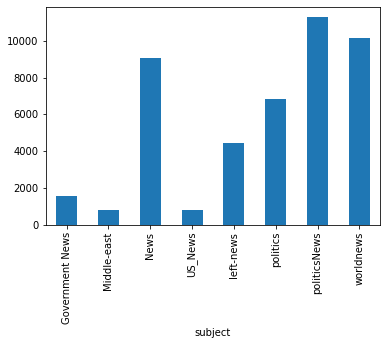

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


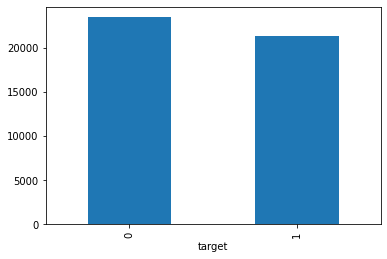

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
!pip install wordcloud

## **WORD CLOUD**

### Word cloud for fake news

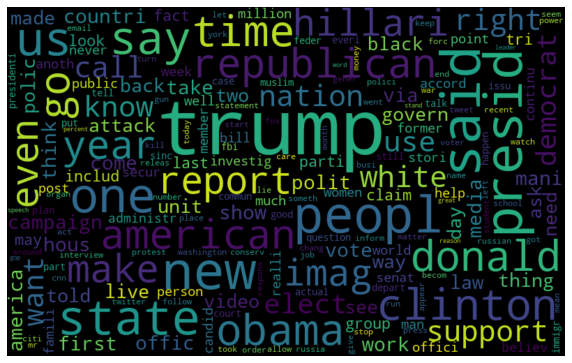

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for real news

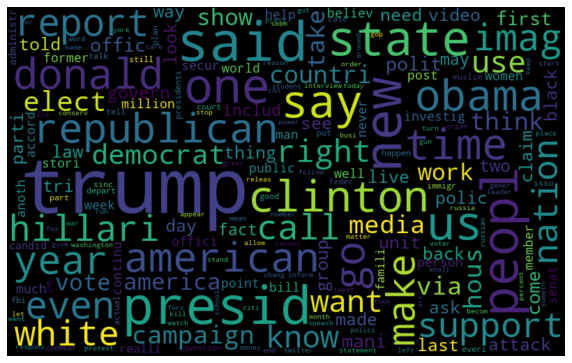

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**FREQUENCY**

In [ ]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

###Most frequent words in fake news

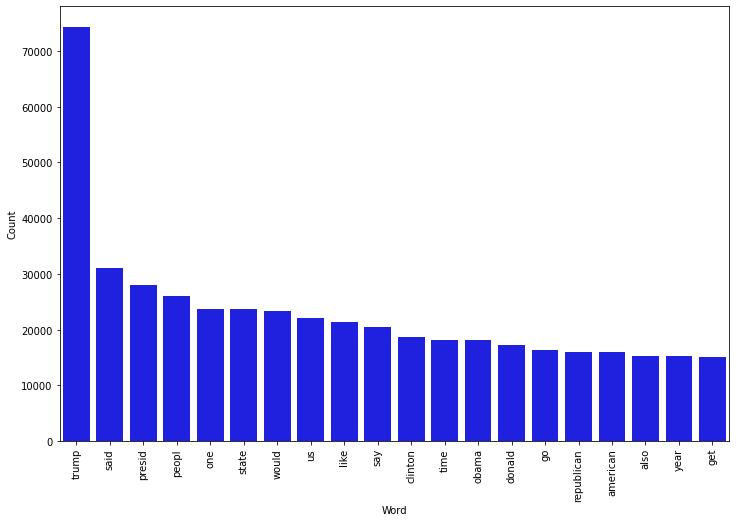

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == 0], "text", 20)

### Most frequent words in real news

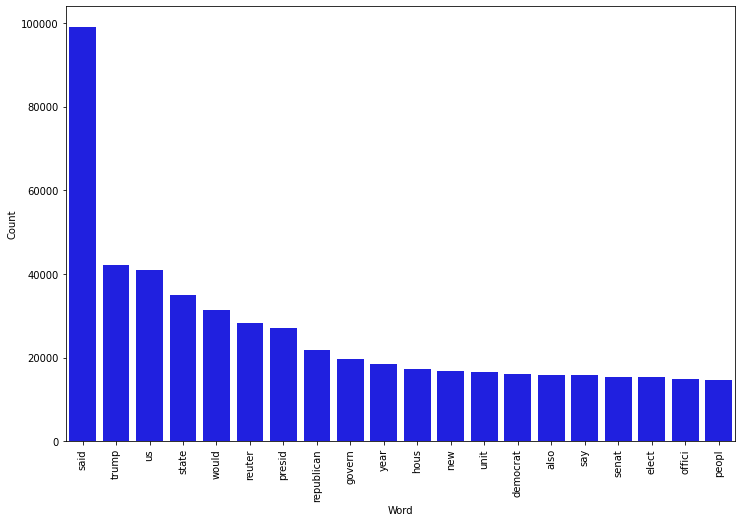

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == 1], "text", 20)

**INFERENCE :-**

**In the EDA,we have printed the bag of words,some bar graphs based on frequent words and to show the class labels count.Word cloud of all words are printed by importing Wordcloud library.**

# **MODELLING**

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **SPLIT DATA**

In [ ]:

# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

36335    main state repres scott hamann clearli unhing ...
12384    wake horrif orlando shoot target lgbtq venu pu...
24419    ridicul woman slap hors scream face protest si...
24740    moscow reuter presid vladimir putin warn frida...
27039    decemb circa sara carter warn would major shak...
Name: text, dtype: object

In [ ]:
y_train.head()

36335    0
12384    0
24419    0
24740    1
27039    0
Name: target, dtype: int64

In [ ]:
accuracies = {}

Dataset split is in the ratio of train set(80) and test set(20) using the hold out method.

## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
accuracies['logistic regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.84%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4703
           1       0.99      0.98      0.99      4277

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


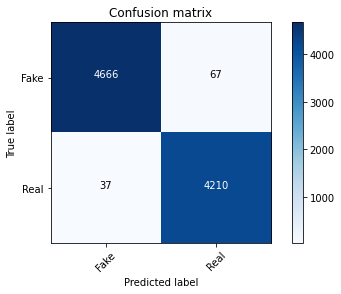

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

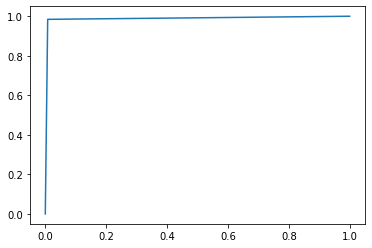

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9882337476946621

**INFERENCE :-**

**Logistic Regression algorithm gave an accuracy,precision,recall,f1 score,auc score of 98.84%,0.99,0.99,0.99,0.988 respectively.**

## **KNN CLASSIFIER**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
maxacc=[]
for i in range(1,20,2):
  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = i))])  
  # Fitting the model
  model = pipe.fit(X_train, y_train)

  # Accuracy
  prediction = model.predict(X_test)
  maxacc.append(round(accuracy_score(y_test, prediction)*100,2))

print("accuracy: {}%".format(maxacc))



accuracy: [79.44, 71.9, 68.69, 65.91, 64.18, 62.73, 61.64, 60.77, 60.18, 59.57]%


In [ ]:
print("Best hyperparameter(K-value)",np.argmax(maxacc)+1)

Best hyperparameter(K-value) 1


In [ ]:
print(maxacc)

[79.44, 71.9, 68.69, 65.91, 64.18, 62.73, 61.64, 60.77, 60.18, 59.57]


In [ ]:
#After finding best K-value

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = np.argmax(maxacc)+1))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))  

accuracies['KNN'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 79.44%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      6265
           1       0.60      0.94      0.73      2715

    accuracy                           0.79      8980
   macro avg       0.78      0.84      0.78      8980
weighted avg       0.86      0.79      0.80      8980



Confusion matrix, without normalization


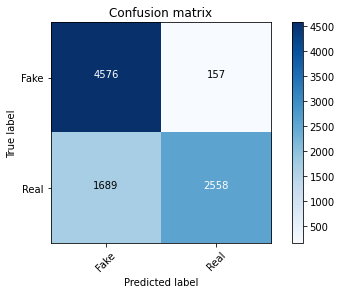

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

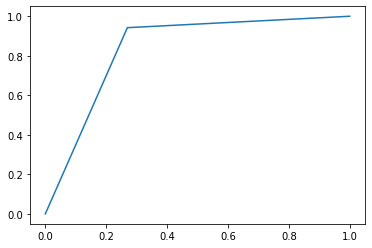

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.8362900677416556

**INFERENCE :-**

**Knn classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 79.44%,0.78,0.84,0.78,0.83  respectively.**

## **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Decision Tree Classifier'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.73%


In [ ]:
#from sklearn.tree import export_graphviz 
  
#export_graphviz(model, out_file ='tree.dot',feature_names = X_train["subject"])

In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4727
           1       1.00      1.00      1.00      4253

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion matrix, without normalization


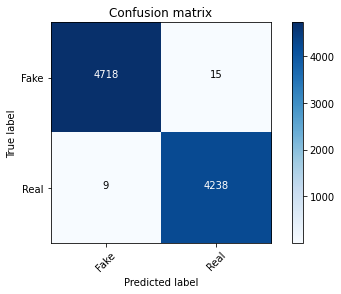

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

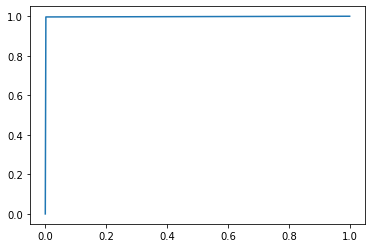

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9972845609149773

**INFERENCE :-**

**Decision Tree classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.73%,1.0,1.0,1.0,0.997 respectively.**

## **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(random_state=0))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Random Forest Classifier'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.91%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4699
           1       0.99      0.98      0.99      4281

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


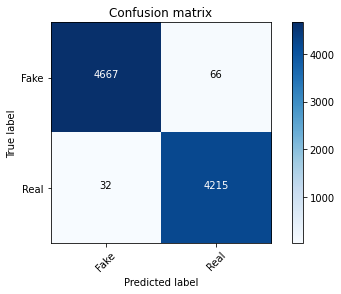

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

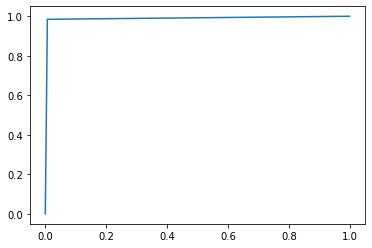

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9888865408898075

**INFERENCE :-**

**Random Forest Classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 98.91%,0.99,0.99,0.99,0.988 respectively.**

## **NAIVE BAYES CLASSIFIER**

###**MULTINOMIAL**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Multinomial Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.17%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4589
           1       0.97      0.93      0.95      4391

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion matrix, without normalization


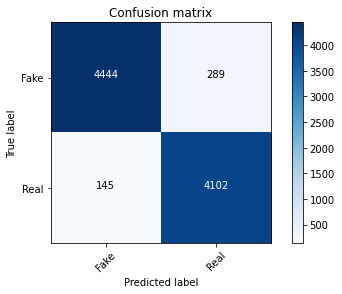

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

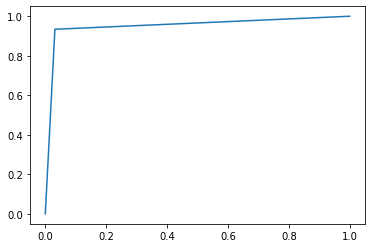

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9512931296949986

**INFERENCE :-**

**Multinomial Naive Bayes algorithm gave an accuracy,precision,recall,f1 score,auc score of 95.17%,0.95,0.95,0.95,0.952 respectively.**


### **BERNOULII**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Bernoulli Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 97.81%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4626
           1       0.99      0.97      0.98      4354

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Confusion matrix, without normalization


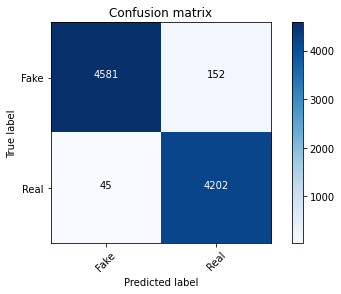

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

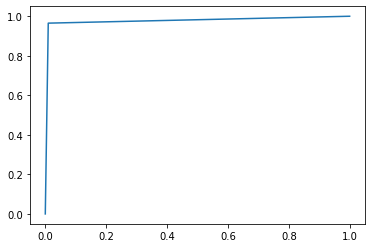

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9776809731737353

**INFERENCE :-**

**Bernoulli Naive Bayes algorithm gave an accuracy,precision,recall,f1 score,auc score of 97.81%,0.98,0.98,0.98,0.977  respectively.**

## **SVM(Support Vector Machine)**

###**LINEAR**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='linear'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Linear)'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.52%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4710
           1       1.00      0.99      0.99      4270

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion matrix, without normalization


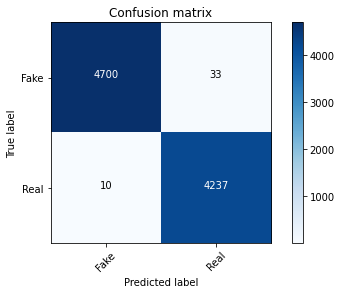

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

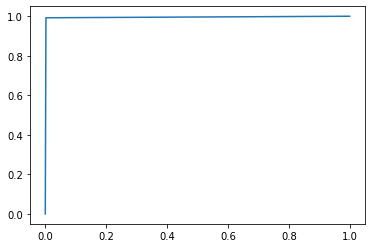

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9950742602564676

**INFERENCE :-**

**SVM linear algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.52%,1.0,1.0,1.0,0.995 respectively.**

###**POLYNOMIAL**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='poly'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Polynomial)'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 95.5%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4999
           1       0.92      0.98      0.95      3981

    accuracy                           0.96      8980
   macro avg       0.95      0.96      0.95      8980
weighted avg       0.96      0.96      0.96      8980



Confusion matrix, without normalization


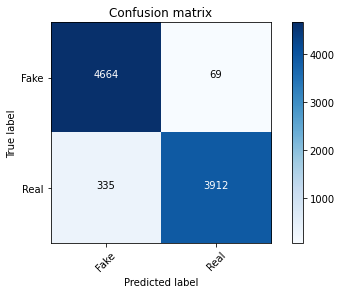

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

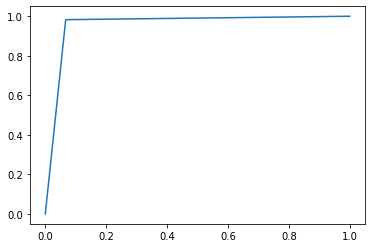

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9578271343794003

**INFERENCE :-**

**SVM polynomial algorithm gave an accuracy,precision,recall,f1 score,auc score of 95.5%,0.95,0.96,0.95,0.958 respectively.**


###**SIGMOID**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='sigmoid'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Sigmoid)'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.44%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4709
           1       1.00      0.99      0.99      4271

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


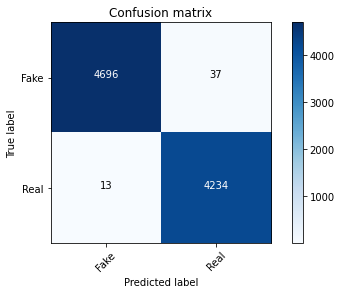

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

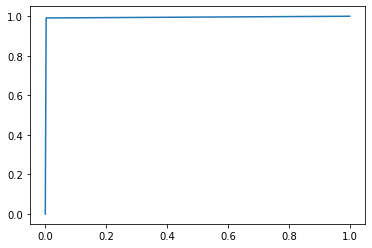

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9942881261908543

**INFERENCE :-**

**SVM sigmoid algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.44%,0.99,0.99,0.99,0.994  respectively.**

###**RBF(Radial Basis Function)**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='rbf'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['RBF'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.47%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4717
           1       1.00      0.99      0.99      4263

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


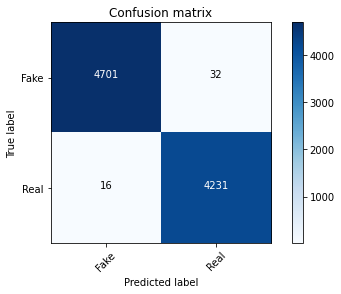

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

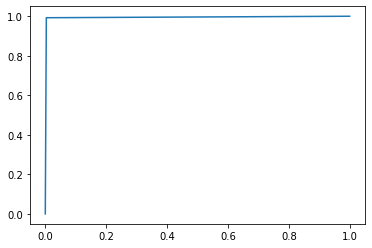

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9945507813558705

**INFERENCE :-**

**SVM radial basis function(RBF) algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.47%,0.99,0.99,0.99,0.994 respectively.**

In [ ]:
sort_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

for i,j in sort_accuracies:
  print(i,":",j)

Decision Tree Classifier : 99.73
SVM(Linear) : 99.52
RBF : 99.47
SVM(Sigmoid) : 99.44
Random Forest Classifier : 98.91
logistic regression : 98.84
Bernoulli Naive Bayes : 97.81
SVM(Polynomial) : 95.5
Multinomial Naive Bayes : 95.17
KNN : 79.44


**INFERENCE :-**

**After applying all the possible algorithms for the Fake news detection dataset Decision Tree classifier with accuracy 99.73%,SVM linear with accuracy 99.52%, SVM RBF with accuracy 99.47% and SVM sigmoid with accuracy 99.44%are the best algorithms for this fake news dataset with good accuracies.**